# Boston housing data

In [1]:
import pandas as pd
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Creating feature and target arrays

In [2]:
X = boston.drop('MEDV',axis=1).values
y = boston['MEDV'].values

In [3]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
#to turn them into numpy arrays of desired shape
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

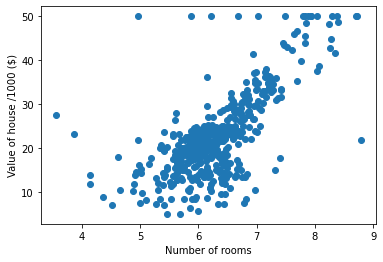

In [5]:
#Plotting house value vn. number of rooms
import matplotlib.pyplot as plt
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [6]:
#Fit a regression model to our data
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

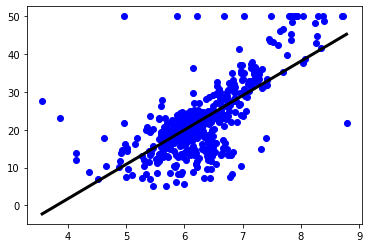

In [7]:
plt.scatter(X_rooms, y , color ='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

In [8]:
#Importing data for supervised learning
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
X = df.fertility.values
y = df.life.values
#print(X)
#print(y)
#print('-------------------')
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)
#print(X)
#print(y)
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))



Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [10]:
#Linear regression on all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test,y_test)

0.7298987360907498

0.6192442167740035


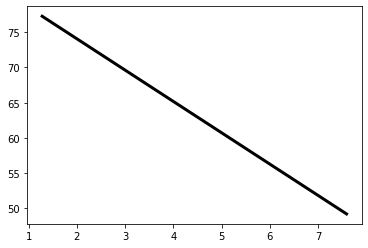

In [11]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
X_fertility = df.fertility.values
y = df.life.values
X_fertility = X_fertility.reshape(-1,1)
y = y.reshape(-1,1)
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility,y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [12]:
#Train/test split for regression
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


In [13]:
#Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y,cv=5)
print(cv_results)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [14]:
np.mean(cv_results)

0.6168819644425119

In [15]:
#5-fold cross-validation
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [16]:
#K-Fold CV comparison
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))


0.6294715754653507
0.5883937741571186


In [17]:
#Regularized regression
#Ridge regession
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha = 0.1,normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.7400155738397823

In [18]:
#Lasso regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha = 0.1,normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.7391302460088129

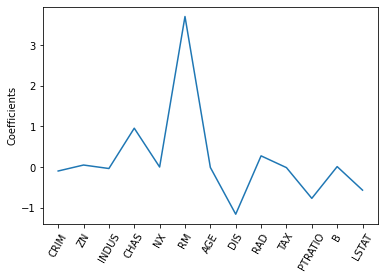

In [19]:
#Lasso regression for feature selection
from sklearn.linear_model import Lasso
X = boston.drop('MEDV',axis=1).values
y = boston['MEDV'].values
names = boston.drop('MEDV',axis=1).columns
#print(names)
#print(boston.head())

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

(139, 8)
(139,)
(139, 1)
[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


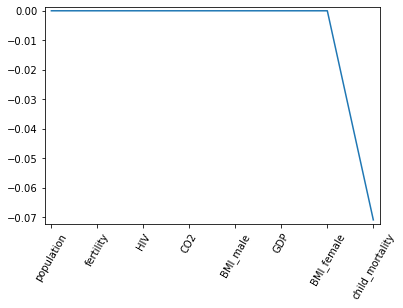

In [34]:
#uses gapminder dataset
#Regularization I: Lasso
# Import Lasso
from sklearn.linear_model import Lasso
df = pd.read_csv('datasets/gm_2008_region.csv')
#df.head()
#df = df.drop('Region',axis=1)
X = df.drop(['life','Region'],axis=1).values
y = df['life'].values
print(X.shape)
print(y.shape)
y = y.reshape(-1,1)
print(y.shape)
# df_columns = df.drop('life',axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


 Conclusions : According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

In [36]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

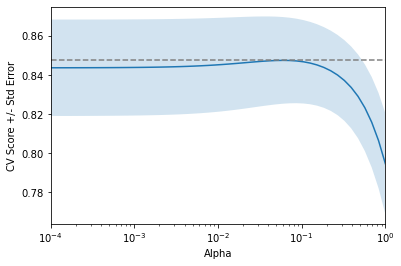

In [37]:
#Regularization II: Ridge
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Conclusions:  the cross-validation scores change with different alphas